In [1]:
from langchain.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()
            
embeddings = OpenAIEmbeddings()

/var/folders/80/965xts3n22bbbvj7_147hmkh0000gn/T/ipykernel_7838/687255454.py:6: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


In [2]:
import numpy as np

def calculate_l2(v1, v2):
    return np.linalg.norm(v1 - v2) ** 2

In [4]:
import matplotlib.pyplot as plt
import textwrap

def wrap_labels(labels, width):
    return [ '\n'.join(textwrap.wrap(label, width)) for label in labels ]

def plot(data, words):
    fig, ax = plt.subplots()
    ax.imshow(data, cmap="Blues")

    labels = wrap_labels(words, 30)
    ax.set_xticks(np.arange(len(words)), labels=labels)
    ax.set_yticks(np.arange(len(words)), labels=labels)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
            rotation_mode="anchor")

    for i in range(len(words)):
        for j in range(len(words)):
            text = ax.text(j, i, round(data[i, j], 2),
                        ha="center", va="center")

    fig.tight_layout()
    plt.show()

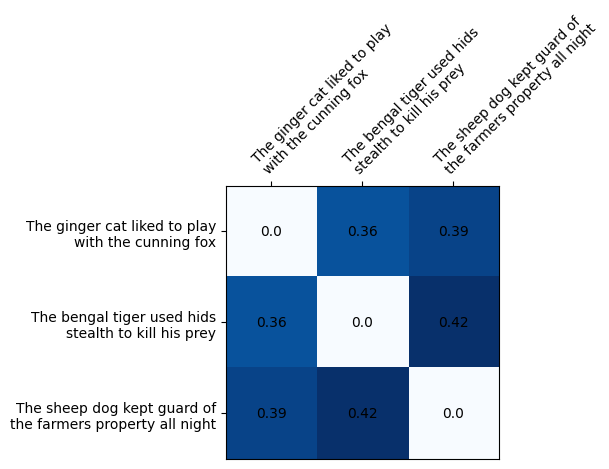

In [14]:
words = [
    "The ginger cat liked to play with the cunning fox",
    "The bengal tiger used hids stealth to kill his prey",
    "The sheep dog kept guard of the farmers property all night",
]

embs = [
    np.array(embeddings.embed_query(word)) for word in words
]

data = np.array([
    [calculate_l2(e1,e2) for e1 in embs] for e2 in embs
])

plot(data, words)